# Training RL to do Cartpole Balancing

This notebooks is part of [AI for Beginners Curriculum](http://aka.ms/ai-beginners). It has been inspired by [official PyTorch tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html) and [this Cartpole PyTorch implementation](https://github.com/yc930401/Actor-Critic-pytorch).

In this example, we will use RL to train a model to balance a pole on a cart that can move left and right on horizontal scale. We will use [OpenAI Gym](https://www.gymlibrary.ml/) environment to simulate the pole.

> **Note**: You can run this lesson's code locally (eg. from Visual Studio Code), in which case the simulation will open in a new window. When running the code online, you may need to make some tweaks to the code, as described [here](https://towardsdatascience.com/rendering-openai-gym-envs-on-binder-and-google-colab-536f99391cc7).

We will start by making sure Gym is installed:

In [ ]:
import sys
!{sys.executable} -m pip install gym

In [1]:
!pip install gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 43.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827626 sha256=88aa01e664877fa7728174b59d663594d057a4bb6ca29c1e0a3b08b006cb16af
  Stored in directory: /home/zeus/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym


Now let's create the CartPole environment and see how to operate on it. An environment has the following properties:

* **Action space** is the set of possible actions that we can perform at each step of the simulation
* **Observation space** is the space of observations that we can make

In [13]:
import gym

env = gym.make("CartPole-v1")
env.reset()
print(f"Action space: {env.action_space}")
print(f"Observation space: {env.observation_space}")

Action space: Discrete(2)
Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


Let's see how the simulation works. The following loop runs the simulation, until `env.step` does not return the termination flag `done`. We will randomly chose actions using `env.action_space.sample()`, which means the experiment will probably fail very fast (CartPole environment terminates when the speed of CartPole, its position or angle are outside certain limits).

> Simulation will open in the new window. You can run the code several times and see how it behaves.

In [11]:
env.action_space.sample()

1

In [14]:
env.step(env.action_space.sample())

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([-0.03762161, -0.23324509,  0.02214256,  0.29058412], dtype=float32),
 1.0,
 False,
 False,
 {})

In [30]:
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [16]:
env.reset()

done = False
total_reward = 0
while not done:
   env.render()
   obs, rew, done, trunc, info = env.step(env.action_space.sample())
   total_reward += rew
   print(f"{obs} -> {rew}")
print(f"Total reward: {total_reward}")

[ 0.00902561 -0.17410493 -0.0357087   0.31493163] -> 1.0
[ 0.00554351  0.021507   -0.02941006  0.01120466] -> 1.0
[ 0.00597365 -0.17318109 -0.02918597  0.2944652 ] -> 1.0
[ 0.00251003 -0.36787504 -0.02329667  0.5778023 ] -> 1.0
[-0.00484747 -0.56266284 -0.01174062  0.8630561 ] -> 1.0
[-0.01610073 -0.36738306  0.0055205   0.566705  ] -> 1.0
[-0.02344839 -0.17233898  0.0168546   0.2757663 ] -> 1.0
[-0.02689517 -0.3676973   0.02236993  0.5737172 ] -> 1.0
[-0.03424912 -0.5631256   0.03384427  0.87336254] -> 1.0
[-0.04551163 -0.3684798   0.05131152  0.59150934] -> 1.0
[-0.05288122 -0.17411235  0.06314171  0.31542084] -> 1.0
[-0.05636347 -0.3700742   0.06945013  0.62732923] -> 1.0
[-0.06376495 -0.56609327  0.08199671  0.94105095] -> 1.0
[-0.07508682 -0.37216642  0.10081773  0.67521805] -> 1.0
[-0.08253015 -0.1785793   0.11432209  0.41590208] -> 1.0
[-0.08610173  0.01475252  0.12264013  0.16133487] -> 1.0
[-0.08580668 -0.18189225  0.12586683  0.49005243] -> 1.0
[-0.08944453 -0.37854415  0.135

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Youn can notice that observations contain 4 numbers. They are:
- Position of cart
- Velocity of cart
- Angle of pole
- Rotation rate of pole

`rew` is the reward we receive at each step. You can see that in CartPole environment you are rewarded 1 point for each simulation step, and the goal is to maximize total reward, i.e. the time CartPole is able to balance without falling.

During reinforcement learning, our goal is to train a **policy** $\pi$, that for each state $s$ will tell us which action $a$ to take, so essentially $a = \pi(s)$.

If you want probabilistic solution, you can think of policy as returning a set of probabilities for each action, i.e. $\pi(a|s)$ would mean a probability that we should take action $a$ at state $s$.

## Policy Gradient Method

In simplest RL algorithm, called **Policy Gradient**, we will train a neural network to predict the next action.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch

num_inputs = 4
num_actions = 2

model = torch.nn.Sequential(
    torch.nn.Linear(num_inputs, 128, bias=False, dtype=torch.float32),
    torch.nn.ReLU(),
    torch.nn.Linear(128, num_actions, bias = False, dtype=torch.float32),
    torch.nn.Softmax(dim=1)
)

In [30]:
model

Sequential(
  (0): Linear(in_features=4, out_features=128, bias=False)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=2, bias=False)
  (3): Softmax(dim=1)
)

We will train the network by running many experiments, and updating our network after each run. Let's define a function that will run the experiment and return the results (so-called **trace**) - all states, actions (and their recommended probabilities), and rewards:

In [17]:
def run_episode(env, max_steps_per_episode = 10000,render=False):
    if render:
        env = gym.wrappers.RecordVideo(env, 'video', 
        # episode_trigger=lambda x: x == 2
        )
        env.start_video_recorder()
    states, actions, probs, rewards = [],[],[],[]
    state, _ = env.reset()
    # state -> observation
    for _ in range(max_steps_per_episode):
        if render:
            env.render()
        action_probs = model(torch.from_numpy(np.expand_dims(state,0)))[0]
        action = np.random.choice(num_actions, p=np.squeeze(action_probs.detach().numpy()))
        nstate, reward, done, _, info = env.step(action)
        if done:
            break
        # records states, actions, rewards --> update the policy networks
        states.append(state)
        actions.append(action)
        probs.append(action_probs.detach().numpy())
        rewards.append(reward)
        state = nstate
    
    if render:
        env.close_video_recorder()

    return np.vstack(states), np.vstack(actions), np.vstack(probs), np.vstack(rewards)

You can run one episode with untrained network and observe that total reward (AKA length of episode) is very low:

In [36]:
gym.wrappers.RecordVideo(env, 'video', 
        # episode_trigger=lambda x: x == 2
        )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /teamspace/studios/this_studio/AI-For-Beginners/lessons/6-Other/22-DeepRL/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


<RecordVideo<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>

In [34]:
!pip install moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 293.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 192.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.17.1+cu121 requires torch==2.2.1, but you have torch 1.13.1 which is incompatible.


In [27]:
# env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()

s, a, p, r = run_episode(env, render=False)
# print(f"Total reward: {np.sum(r)}")
s, a, p, r, len(s)

(array([[-4.8146378e-03, -7.6815011e-03, -4.1892648e-02,  2.6587080e-02],
        [-4.9682679e-03,  1.8801540e-01, -4.1360907e-02, -2.7901357e-01],
        [-1.2079600e-03, -6.4928532e-03, -4.6941180e-02,  3.4265337e-04],
        [-1.3378171e-03,  1.8926978e-01, -4.6934325e-02, -3.0677348e-01],
        [ 2.4475786e-03,  3.8502800e-01, -5.3069796e-02, -6.1388111e-01],
        [ 1.0148139e-02,  5.8084983e-01, -6.5347418e-02, -9.2279547e-01],
        [ 2.1765135e-02,  7.7679086e-01, -8.3803326e-02, -1.2352782e+00],
        [ 3.7300952e-02,  5.8284003e-01, -1.0850889e-01, -9.6998221e-01],
        [ 4.8957754e-02,  7.7923799e-01, -1.2790853e-01, -1.2946856e+00],
        [ 6.4542510e-02,  5.8595204e-01, -1.5380225e-01, -1.0446278e+00],
        [ 7.6261550e-02,  7.8274405e-01, -1.7469481e-01, -1.3813711e+00]],
       dtype=float32),
 array([[1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1]]),
 array([[0.497365

One of the tricky aspects of policy gradient algorithm is to use **discounted rewards**. The idea is that we compute the vector of total rewards at each step of the game, and during this process we discount the early rewards using some coefficient $gamma$. We also normalize the resulting vector, because we will use it as weight to affect our training: 

In [31]:
r.shape

(11, 1)

In [25]:
discounted_rewards(r, normalize=False)

[array([22.99568542]),
 array([22.21786406]),
 array([21.43218592]),
 array([20.63857164]),
 array([19.83694105]),
 array([19.02721318]),
 array([18.20930624]),
 array([17.38313762]),
 array([16.54862385]),
 array([15.70568066]),
 array([14.85422289]),
 array([13.99416454]),
 array([13.12541872]),
 array([12.2478977]),
 array([11.36151283]),
 array([10.46617457]),
 array([9.5617925]),
 array([8.64827525]),
 array([7.72553056]),
 array([6.79346521]),
 array([5.85198506]),
 array([4.90099501]),
 array([3.940399]),
 array([2.9701]),
 array([1.99]),
 array([1.])]

In [23]:
eps = 0.0001

def discounted_rewards(rewards,gamma=0.99,normalize=True):
    ret = []
    s = 0
    for r in rewards[::-1]:
        s = r + gamma * s
        ret.insert(0, s)
    if normalize:
        ret = (ret-np.mean(ret))/(np.std(ret)+eps)
    return ret

Now let's do the actual training! We will run 300 episodes, and at each episode we will do the following:

1. Run the experiment and collect the trace
1. Calculate the difference (`gradients`) between the actions taken, and by predicted probabilities. The less the difference is, the more we are sure that we have taken the right action.
1. Calculate discounted rewards and multiply gradients by discounted rewards - that will make sure that steps with higher rewards will make more effect on the final result than lower-rewarded ones
1. Expected target actions for our neural network would be partly taken from the predicted probabilities during the run, and partly from calculated gradients. We will use `alpha` parameter to determine to which extent gradients and rewards are taken into account - this is called *learning rate* of reinforcement algorithm.
1. Finally, we train our network on states and expected actions, and repeat the process 

In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train_on_batch(x, y):
    x = torch.from_numpy(x)
    y = torch.from_numpy(y)
    optimizer.zero_grad()
    predictions = model(x)
    loss = -torch.mean(torch.log(predictions) * y)
    loss.backward()
    optimizer.step()
    return loss

0 -> 42.0
100 -> 189.0


200 -> 1000.0


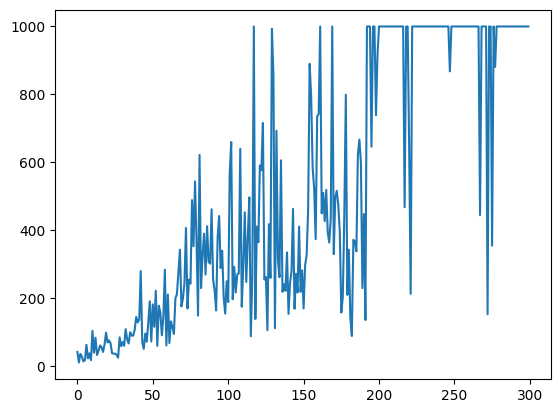

In [29]:
alpha = 1e-4

history = []
for epoch in range(300):
    states, actions, probs, rewards = run_episode(env, 1000)

    # actions -> labels 
    one_hot_actions = np.eye(2)[actions.T][0]

    # gradients -> labels (actions) - probs (outputs)
    gradients = one_hot_actions-probs
    dr = discounted_rewards(rewards)
    gradients *= dr
    # gradients = gradients * discounted_rewards
    target = alpha*np.vstack([gradients])+probs
    train_on_batch(states,target)
    history.append(np.sum(rewards))
    if epoch%100==0:
        print(f"{epoch} -> {np.sum(rewards)}")

plt.plot(history)

Now let's run the episode with rendering to see the result:

In [ ]:
_ = run_episode(render=True)

Hopefully, you can see that pole can now balance pretty well!

## Actor-Critic Model

Actor-Critic model is the further development of policy gradients, in which we build a neural network to learn both the policy and estimated rewards. The network will have two outputs (or you can view it as two separate networks):
* **Actor** will recommend the action to take by giving us the state probability distribution, as in policy gradient model
* **Critic** would estimate what the reward would be from those actions. It returns total estimated rewards in the future at the given state.

Let's define such a model: 

In [40]:
from itertools import count
import torch.nn.functional as F

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
env = gym.make("CartPole-v1")

state_size = env.observation_space.shape[0]
action_size = env.action_space.n
lr = 0.0001

# policy network model: model (4 inputs, 2 outputs)
class Actor(torch.nn.Module):
    def __init__(self, state_size, action_size):
        super(Actor, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear1 = torch.nn.Linear(self.state_size, 128)
        self.linear2 = torch.nn.Linear(128, 256)
        self.linear3 = torch.nn.Linear(256, self.action_size)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        output = self.linear3(output)
        distribution = torch.distributions.Categorical(F.softmax(output, dim=-1))
        return distribution

# estimate value function: estimate total reward at each observation: model (4 inputs, 1 output)
class Critic(torch.nn.Module):
    def __init__(self, state_size, action_size):
        super(Critic, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear1 = torch.nn.Linear(self.state_size, 128)
        self.linear2 = torch.nn.Linear(128, 256)
        self.linear3 = torch.nn.Linear(256, 1)

    def forward(self, state):
        output = F.relu(self.linear1(state))
        output = F.relu(self.linear2(output))
        value = self.linear3(output)
        return value

We would need to slightly modify our `discounted_rewards` and `run_episode` functions:

In [46]:
def discounted_rewards(next_value, rewards, masks, gamma=0.99):
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step] + gamma * R * masks[step]
        returns.insert(0, R)
    return returns

def run_episode(actor, critic, n_iters):
    # env.start_video_recorder()
    optimizerA = torch.optim.Adam(actor.parameters())
    optimizerC = torch.optim.Adam(critic.parameters())
    scores = []
    for iter in range(n_iters):
        state, _ = env.reset()
        log_probs = []
        values = []
        rewards = []
        masks = []
        entropy = 0
        env.reset()

        i = 0
        while True:
            env.render()
            state = torch.FloatTensor(state).to(device)
            dist, value = actor(state), critic(state)

            action = dist.sample()
            next_state, reward, done, _, _ = env.step(action.cpu().numpy())

            log_prob = dist.log_prob(action).unsqueeze(0)
            entropy += dist.entropy().mean()

            log_probs.append(log_prob)
            values.append(value)
            rewards.append(torch.tensor([reward], dtype=torch.float, device=device))
            masks.append(torch.tensor([1-done], dtype=torch.float, device=device))

            state = next_state

            if done:
                print('Iteration: {}, Score: {}'.format(iter, i))
                break
            i+=1
        scores.append(i)

        next_state = torch.FloatTensor(next_state).to(device)
        next_value = critic(next_state)
        returns = discounted_rewards(next_value, rewards, masks)

        log_probs = torch.cat(log_probs)
        returns = torch.cat(returns).detach()
        values = torch.cat(values)

        advantage = returns - values

        actor_loss = -(log_probs * advantage.detach()).mean() # cross entropy error (log_probs (target)) : positive or negative
        critic_loss = advantage.pow(2).mean() # mean squared error (discounted_rewards (target), values (output_estimation))

        optimizerA.zero_grad()
        optimizerC.zero_grad()
        actor_loss.backward()
        critic_loss.backward()
        optimizerA.step()
        optimizerC.step()
    return scores


Now we will run the main training loop. We will use manual network training process by computing proper loss functions and updating network parameters:

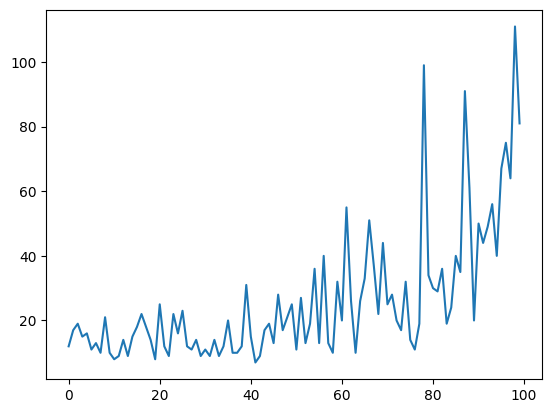

In [48]:
plt.plot(scores)

In [49]:

device = 'cpu'
actor = Actor(state_size, action_size).to(device)
critic = Critic(state_size, action_size).to(device)
# scores = run_episode(actor, critic, n_iters=100)

max_score_eps = []
for epoch in range(20):
    scores = run_episode(actor, critic, n_iters=1000)
    max_score_eps.append(max(scores))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Iteration: 0, Score: 14
Iteration: 1, Score: 42
Iteration: 2, Score: 24
Iteration: 3, Score: 27
Iteration: 4, Score: 18
Iteration: 5, Score: 8
Iteration: 6, Score: 18
Iteration: 7, Score: 18
Iteration: 8, Score: 11
Iteration: 9, Score: 19
Iteration: 10, Score: 34
Iteration: 11, Score: 61
Iteration: 12, Score: 15
Iteration: 13, Score: 86
Iteration: 14, Score: 24
Iteration: 15, Score: 20
Iteration: 16, Score: 9
Iteration: 17, Score: 16
Iteration: 18, Score: 14
Iteration: 19, Score: 13
Iteration: 20, Score: 14
Iteration: 21, Score: 11
Iteration: 22, Score: 11
Iteration: 23, Score: 17
Iteration: 24, Score: 9
Iteration: 25, Score: 16
Iteration: 26, Score: 24
Iteration: 27, Score: 38
Iteration: 28, Score: 15
Iteration: 29, Score: 28
Iteration: 30, Score: 9
Iteration: 31, Score: 15
Iteration: 32, Score: 23
Iteration: 33, Score: 49
Iteration: 34, Score: 15
Iteration: 35, Score: 18
Iteration: 36, Score: 12
Iteration: 37, Score: 24
Iteration: 38, Score: 37
Iteration: 39, Score: 11
Iteration: 40,

Iteration: 103, Score: 105
Iteration: 104, Score: 71
Iteration: 105, Score: 111
Iteration: 106, Score: 200
Iteration: 107, Score: 91
Iteration: 108, Score: 160
Iteration: 109, Score: 110
Iteration: 110, Score: 111
Iteration: 111, Score: 165
Iteration: 112, Score: 79
Iteration: 113, Score: 115
Iteration: 114, Score: 167
Iteration: 115, Score: 72
Iteration: 116, Score: 118
Iteration: 117, Score: 101
Iteration: 118, Score: 185
Iteration: 119, Score: 172
Iteration: 120, Score: 263
Iteration: 121, Score: 137
Iteration: 122, Score: 184
Iteration: 123, Score: 136
Iteration: 124, Score: 252
Iteration: 125, Score: 219
Iteration: 126, Score: 176
Iteration: 127, Score: 201
Iteration: 128, Score: 335
Iteration: 129, Score: 225
Iteration: 130, Score: 289
Iteration: 131, Score: 332
Iteration: 132, Score: 425
Iteration: 133, Score: 505
Iteration: 134, Score: 522
Iteration: 135, Score: 374
Iteration: 136, Score: 185
Iteration: 137, Score: 227
Iteration: 138, Score: 361
Iteration: 139, Score: 241
Itera

KeyboardInterrupt: 

Finally, let's close the environment.

In [ ]:
env.close()

## Takeaway

We have seen two RL algorithms in this demo: simple policy gradient, and more sophisticated actor-critic. You can see that those algorithms operate with abstract notions of state, action and reward - thus they can be applied to very different environments.

Reinforcement learning allows us to learn the best strategy to solve the problem just by looking at the final reward. The fact that we do not need labelled datasets allows us to repeat simulations many times to optimize our models. However, there are still many challenges in RL, which you may learn if you decide to focus more on this interesting area of AI.   